# Работа с Excel

Материалы:
* Макрушин С.В. Лекция 7: Работа с Excel
* https://docs.xlwings.org/en/stable/quickstart.html
* https://nbviewer.jupyter.org/github/pybokeh/jupyter_notebooks/blob/master/xlwings/Excel_Formatting.ipynb#search_text


## Задачи для совместного разбора

1. На листе "Рецептура" файла `себестоимостьА_в1.xlsx` для области "Пшеничный хлеб" рассчитать себестоимость всех видов продукции.

In [51]:
pip install xlwings


Note: you may need to restart the kernel to use updated packages.


In [2]:
conda install -c conda-forge xlwings

Retrieving notices: ...working... done
Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.




==> WARNING: A newer version of conda exists. <==
  current version: 23.1.0
  latest version: 23.3.1

Please update conda by running

    $ conda update -n base -c conda-forge conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.3.1




In [50]:
conda install conda=23.3.1

Retrieving notices: ...working... done
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\1\anaconda3

  added / updated specs:
    - conda


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-pack-0.7.0           |     pyh6c4a22f_0          30 KB  conda-forge
    conda-package-handling-2.0.2|     pyh38be061_0         247 KB  conda-forge
    conda-package-streaming-0.7.0|     pyhd8ed1ab_1          17 KB  conda-forge
    conda-repo-cli-1.0.41      |   py39haa95532_0         142 KB
    freetype-2.10.4            |       hd328e21_0         489 KB  conda-forge
    libzopfli-1.0.3            |       ha925a31_0         202 KB  conda-forge
    m2-msys2-runtime-2.5.0.17080.65c939c|                3         3.0 MB  conda-forge
    m2-patch-2.7.5             |                2          90 KB  conda-forge
    m2w64-libwinpthread-git-5.0.0.4634.697f757| 



==> WARNING: A newer version of conda exists. <==
  current version: 23.1.0
  latest version: 23.3.1

Please update conda by running

    $ conda update -n base -c conda-forge conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.3.1




Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\1\anaconda3

  added / updated specs:
    - conda=23.3.1


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    boltons-23.0.0             |   py39haa95532_0         421 KB
    conda-23.3.1               |   py39haa95532_0         972 KB
    jsonpatch-1.32             |     pyhd3eb1b0_0          15 KB
    jsonpointer-2.1            |     pyhd3eb1b0_0           9 KB
    ------------------------------------------------------------
                                           Total:         1.4 MB

The following NEW packages will be INSTALLED:

  boltons            pkgs/main/win-64::boltons-23.0.0-py39haa95532_0 
  jsonpatch          pkgs/main/noarch::jsonpatch-1.32-pyhd3eb1b0_0 
  jsonpointer        pkgs/main/noarch::jsonpointer-2.1-pyhd3eb1b0_0 

The following packages will be UPDATED:

  conda         

In [3]:
import openpyxl
import xlwings as xw

In [53]:
app = xw.App(visible=True,add_book=True)

In [54]:
wb = app.books.open('себестоимостьА_в1.xlsx')
sht = wb.sheets['Рецептура']
lines = [list(map(lambda x: x if x != None else 0, i)) for i in sht.range('G7:O10').value]
cost = sht.range('G14:O14').value
name = sht.range('C7:C10').value
self_costs = []
for i in range(4):
    print(name[i], sum([k*j for k,j in zip(lines[i], cost)]))
    self_costs.append(sum([k*j for k,j in zip(lines[i], cost)]))



Хлеб Венгерский 21.48
Хлеб "Барбари" 16.525
Багет парижский 17.423000000000002
Чиабатта 18.085


2. Результаты расчетов 1.1 сохранить в отдельном столбце области "Пшеничный хлеб"

In [55]:
sht.range('T7').options(transpose = True).value = self_costs
sht.range('T6').value = 'Себестоимость' 
print(sht.range('T6').value)

Себестоимость


3. Приблизить форматирование столбца, добавленного в задаче 2 к оформлению всей области.




In [56]:
sht.range('T4:T6').merge()
sht.range('T4:T6').color = (255,200,0)
sht.range('T7:T13').color = (244,244,180)

4. Выполнить 3 с помощью "протягиваемых" формул.

In [57]:
wb.save('себестоимостьА_в2.xlsx')

In [58]:
wb.close()

## Лабораторная работа 7.1

1. Загрузите данные из файлов `reviews_sample.csv` (__ЛР2__) и `recipes_sample.csv` (__ЛР5__) в виде `pd.DataFrame`. Обратите внимание на корректное считывание столбца(ов) с индексами. Оставьте в таблице с рецептами следующие столбцы: `id`, `name`, `minutes`, `submitted`, `description`, `n_ingredients`

In [24]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [68]:
import pandas as pd
reviews = pd.read_csv(r"C:\Users\1\Desktop\Программирование\ТОД\04_tables\data\reviews_sample.csv")
reviews.rename(columns={'Unnamed: 0':'index'}, inplace = True)
recipes = pd.read_csv(r"C:\Users\1\Desktop\Программирование\ТОД\04_tables\data\recipes_sample.csv").drop(['contributor_id','n_steps'], axis = 1)

In [69]:
recipes

,name,id,minutes,submitted,description,n_ingredients
0,george s at the cove black bean soup,44123,90,2002-10-25,an original recipe created by chef scott meska...,18.0
1,healthy for them yogurt popsicles,67664,10,2003-07-26,my children and their friends ask for my homem...,NaN
2,i can t believe it s spinach,38798,30,2002-08-29,"these were so go, it surprised even me.",8.0
3,italian gut busters,35173,45,2002-07-27,my sister-in-law made these for us at a family...,NaN
4,love is in the air beef fondue sauces,84797,25,2004-02-23,i think a fondue is a very romantic casual din...,NaN
...,...,...,...,...,...,...
29995,zurie s holey rustic olive and cheddar bread,267661,80,2007-11-25,this is based on a french recipe but i changed...,10.0
29996,zwetschgenkuchen bavarian plum cake,386977,240,2009-08-24,"this is a traditional fresh plum cake, thought...",11.0
29997,zwiebelkuchen southwest german onion cake,103312,75,2004-11-03,this is a traditional late summer early fall s...,NaN
29998,zydeco soup,486161,60,2012-08-29,this is a delicious soup that i originally fou...,NaN


2. Случайным образом выберите 5% строк из каждой таблицы и сохраните две таблицы на разные листы в один файл `recipes.xlsx`. Дайте листам названия "Рецепты" и "Отзывы", соответствующие содержанию таблиц. 

In [70]:
with pd.ExcelWriter("recipes.xlsx") as writer:
    reviews.sample(frac=0.05).to_excel(writer, sheet_name = 'Рецепты', index = False)
    recipes.sample(frac=0.05).to_excel(writer, sheet_name = 'Отзывы', index = False)
    

3. Используя `xlwings`, добавьте на лист `Рецепты` столбец `seconds_assign`, показывающий время выполнения рецепта в секундах. Выполните задание при помощи присваивания массива значений диапазону ячеек.

In [42]:
wb = xw.Book("recipes.xlsx")
recipes = wb.sheets['Рецепты']
reviews = wb.sheets['Отзывы']
reviews_pd = reviews.range('B:C').expand('down').options(pd.DataFrame, header=1, index=False).value
recipes_pd = recipes.range('C:C').expand('down').options(pd.DataFrame, header=1, index=False).value
new_colum = recipes_pd.merge(reviews_pd, how="inner", left_on='recipe_id', right_on='id').drop('id', axis = 1)
recipes.range('G2:G2').options(transpose=True).value = new_colum['minutes'].values
recipes.range('H2:H2').options(transpose=True).value = new_colum['minutes'].values*60
recipes.range('G1').value = 'minutes'
recipes.range('H1').value = 'seconds_formula'


4. Используя `xlwings`, добавьте на лист `Рецепты` столбец `seconds_formula`, показывающий время выполнения рецепта в секундах. Выполните задание при помощи формул Excel.

In [43]:
import numpy as np
import pandas as pd

In [62]:
wb = xw.Book("recipes.xlsx")
recipes = wb.sheets['Рецепты']
reviews = wb.sheets['Отзывы']
reviews_pd = reviews.range('B:C').expand('down').options(pd.DataFrame, header=1, index=False).value
recipes_pd = recipes.range('C:C').expand('down').options(pd.DataFrame, header=1, index=False).value
new_colum = recipes_pd.merge(reviews_pd, how="inner", left_on='recipe_id', right_on='id').drop('id', axis = 1)
recipes.range('G2:G2').options(transpose=True).value = new_colum['minutes'].values
recipes.range('G1').value = 'minutes'
recipes.range('H1').value = 'seconds_formula'
recipes.range('H2:H6336').formula = '=G2*60'

5. Сделайте названия всех добавленных столбцов полужирными и выровняйте по центру ячейки.

In [63]:
recipes['G1'].font.bold = True
recipes['H1'].font.bold = True


In [64]:
recipes['H1'].api.HorizontalAlignment = xw.constants.HAlign.xlHAlignCenter
recipes['G1'].api.HorizontalAlignment = xw.constants.HAlign.xlHAlignCenter

6. Раскрасьте ячейки столбца `minutes` в соответствии со следующим правилом: если рецепт выполняется быстрее 5 минут, то цвет - зеленый; от 5 до 10 минут - жёлтый; и больше 10 - красный.

In [65]:
data = recipes.range('G2').expand('down').value
for i in range(len(data)):
    if data[i] < 5:
        recipes[f'G{i+2}'].color = (0,255,0)
    if 5 <= data[i] <= 10:
        recipes[f'G{i+2}'].color = (255,255,0)
    if data[i] > 10:
        recipes[f'G{i+2}'].color = (255,0,0)

7. Добавьте на лист `Рецепты`  столбец `n_reviews`, содержащий кол-во отзывов для этого рецепта. Выполните задание при помощи формул Excel.

In [69]:
recipes.range('I1').value = 'n_reviews'
data = recipes.range('B2').expand('down').value
recipes['I2:I6336'].formula= "=СЧЕТЕСЛИ('Отзывы'!$B$2:$B$1501;B2)"



## Лабораторная работа 7.2

8. Напишите функцию `validate()`, которая проверяет соответствие всех строк из листа `Отзывы` следующим правилам:
    * Рейтинг - это число от 0 до 5 включительно
    * Соответствующий рецепт имеется на листе `Рецепты`
    
В случае несоответствия этим правилам, выделите строку красным цветом

In [60]:
def validate():
    recipe_id = recipes['B:B'][1:].value
    for i,j in enumerate(reviews.range('A2').expand().value):
        if j[2] not in recipe_id or not 0.0 <= j[4] <= 5.0:
            reviews.range(f'A{i+1}:F{i+1}').color = (255, 0, 0)

In [61]:
validate()

9. В файле `recipes_model.csv` находится модель данных предметной области "рецепты". При помощи пакета `csv` считайте эти данные. При помощи пакета `xlwings` запишите данные на лист `Модель` книги `recipes_model.xlsx`, начиная с ячейки `A2`, не используя циклы. Сделайте скриншот текущего состояния листа и прикрепите в ячейку ноутбука. 

In [84]:
import csv

In [118]:
with open(r"C:\Users\1\Desktop\Программирование\ТОД\04_tables\data\recipes_model.csv", encoding='utf-8') as f:
    reader = csv.reader(f, delimiter = "\t")
    list_ = []
    for i in reader:
        list_.append(','.join(i).split(','))
print(list_)


[['recipe', 'name', 'varchar(100)', 'Y', 'Рецепт', 'Название рецепта', '', '', ''], ['recipe', 'id', 'serial', 'N', 'Рецепт', 'ID рецепта', 'PK', '', ''], ['recipe', 'minutes', 'int', 'Y', 'Рецепт', 'Длительность выполнения в минутах', '', '', ''], ['recipe', 'contributor_id', 'int', 'Y', 'Рецепт', 'ID автора рецепта', 'FK', 'user', 'id'], ['recipe', 'submitted', 'timestamp', 'Y', 'Рецепт', 'Дата добавления', '', '', ''], ['recipe', 'n_steps', 'int', 'N', 'Рецепт', 'Кол-во шагов рецепта', '', '', ''], ['recipe', 'description', 'text', 'N', 'Рецепт', 'Описание рецепта', '', '', ''], ['recipe', 'n_ingredients', 'int', 'N', 'Рецепт', 'Кол-во ингредиентов в рецепта', '', '', ''], ['review', 'id', 'serial', 'Y', 'Отзыв', 'ID отзыва', 'PK', '', ''], ['review', 'user_id', 'int', 'Y', 'Отзыв', 'ID автора отзыва', 'FK', '', ''], ['review', 'recipe_id', 'int', 'Y', 'Отзыв', 'ID рецепта', 'FK', 'recipe', 'id'], ['review', 'date', 'timestamp', 'Y', 'Отзыв', 'Дата добавления отзыва', '', '', ''], [

In [117]:
wb = xw.Book()
wb.sheets.add('Модуль')
ws = wb.sheets['Модуль']
ws.range('A2').value = list_[:]

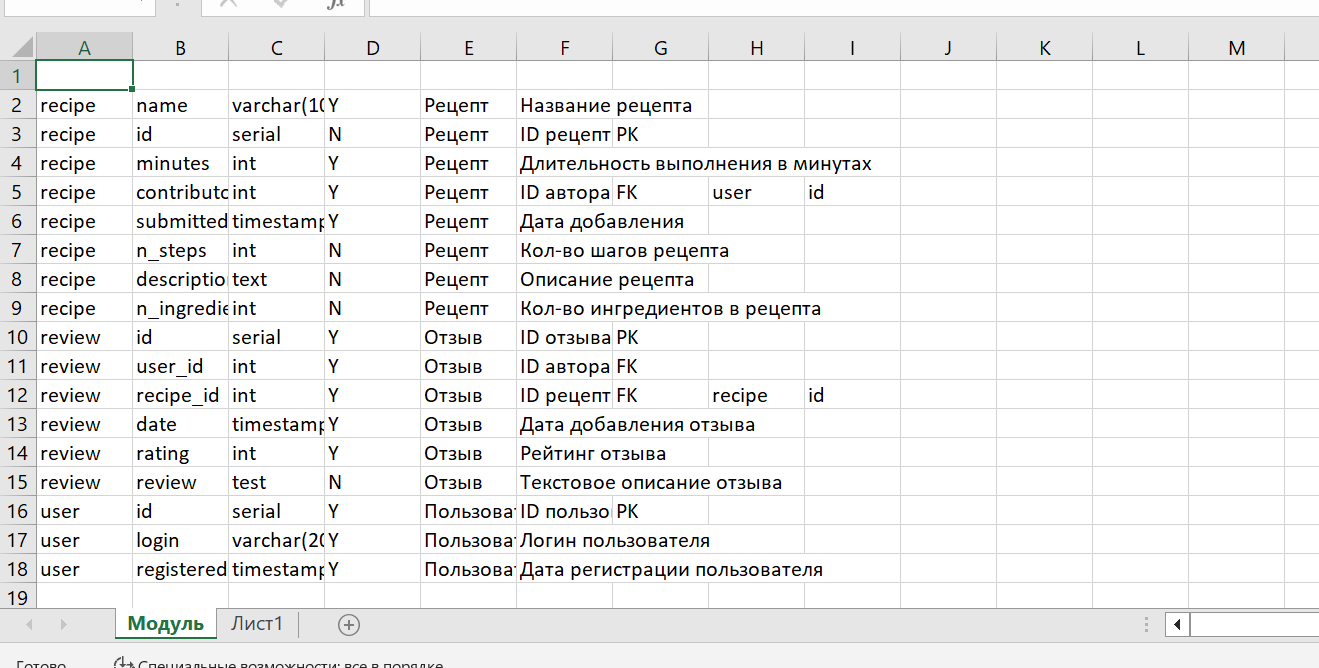

10. При помощи пакета `xlwings` добавьте в столбец J формулу для описания столбца на языке SQL. Формула должна реализовывать следующую логику:

    1\. в начале строки идут значения из столбцов В и C (значение столбца С приведено к верхнему регистру), разделенные пробелом
    
    2\. далее идут слова на основе столбца "Ключ"
        2.1 если в столбце "Ключ" указано значение "PK", то дальше через пробел идет ключевое слово "PRIMARY KEY"
        2.2 если в столбце "Ключ" указано значение "FK", то дальше через пробел идет ключевое слово "REFERENCES", затем значения столбцов H и I в формате "название_таблицы(название_столбца)"
        
    3\. если в столбце "Обязательно к заполнению" указано значение "Y" и в столбце "Ключ" указано не "PK", то дальше через пробел идет ключевое слово "NOT NULL".

Заполните этой формулой необходимое количество строк, используя "протягивание". Количество строк для протягивания определите на основе данных.

Сделайте скриншот текущего состояния листа и прикрепите в ячейку ноутбука.

In [ ]:
ws.range('J:J').formula = 

11. При помощи пакета `xlwings` измените стилизацию листа `Модель`.
* для заголовков добавьте заливку цвета `00ccff`
* примените автоподбор ширины столбца;
* сделайте шрифт заголовков полужирным;
* добавьте таблице автофильтр.

Сделайте скриншот текущего состояния листа и прикрепите в ячейку ноутбука.

12. Посчитайте количество атрибутов для каждой из сущностей. Создайте лист `Статистика` и запишите в него результат группировки, начиная с ячейки "А1". Визуализируйте полученный результат при помощи столбчатой диаграммы. Сохраните полученную визуализацию на лист `Статистика`, начиная с ячейки "E2".  Сделайте скриншот листа `Статистика` и прикрепите в ячейку ноутбука.

* Вы можете воспользоваться методами для визуализации, которые поставляются вместе с объектами `pandas` (см. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot) 